In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data1= pd.read_csv('D:\\Assignment_CS\\Zeel\\in-vehicle-coupon-recommendation.csv')
data1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data1.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [6]:
data1["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [7]:
data1.drop('car', inplace=True, axis=1)

In [8]:
for x in data1.columns[data1.isna().any()]:
    data1 = data1.fillna({x: data1[x].value_counts().idxmax()})

In [9]:
df_obj = data1.select_dtypes(include=['object']).copy()

for col in df_obj.columns:
    data1[col]=data1[col].astype('category')
    
data1.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [10]:
#To begin, we create maps to represent the categories and their respective orders.
#Then we need to convert the categorical data in these 7 columns into ordered numerical data 
#This can be done by match the cols with the numerical maps.

#This map is to represent the frequency of visits to restaurants, bars, and coffeehouses.
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

#since some of the cols have the same categories, we can put them in a list
frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 
                  'CarryAway', 'CoffeeHouse', 'Bar']

#use for loop to match cols with frequency_map
for col in frequency_cols:
    data1[col] = data1[col].map(frequency_map)


#This map is to represent the driver's age
age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}

#Here we match the age col with age map
data1['age'] = data1['age'].map(age_map)

#This map is to represent the driver's income
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

#Here we match the income col with income map
data1['income'] = data1['income'].map(income_map)

In [11]:
from sklearn.preprocessing import LabelEncoder
converter = LabelEncoder()
data1['destination'] = converter.fit_transform(data1['destination'])
data1['passanger'] = converter.fit_transform(data1['passanger'])
data1['weather'] = converter.fit_transform(data1['weather'])
data1['time'] = converter.fit_transform(data1['time'])
data1['coupon'] = converter.fit_transform(data1['coupon'])
data1['expiration'] = converter.fit_transform(data1['expiration'])
data1['gender'] = converter.fit_transform(data1['gender'])
data1['maritalStatus'] = converter.fit_transform(data1['maritalStatus'])
data1['education'] = converter.fit_transform(data1['education'])
data1['occupation'] = converter.fit_transform(data1['occupation'])

#To check the categories conversion

for n in data1.select_dtypes('int64').columns:
    print(n, data1[n].unique())

temperature [55 80 30]
has_children [1 0]
toCoupon_GEQ5min [1]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


In [12]:
data1.dtypes

destination                int32
passanger                  int32
weather                    int32
temperature                int64
time                       int32
coupon                     int32
expiration                 int32
gender                     int32
age                     category
maritalStatus              int32
has_children               int64
education                  int32
occupation                 int32
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [13]:
cols = ['age', 'income', 'Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cols:
    data1[col] = data1[col].astype('int64')

In [14]:
data1.dtypes

destination             int32
passanger               int32
weather                 int32
temperature             int64
time                    int32
coupon                  int32
expiration              int32
gender                  int32
age                     int64
maritalStatus           int32
has_children            int64
education               int32
occupation              int32
income                  int64
Bar                     int64
CoffeeHouse             int64
CarryAway               int64
RestaurantLessThan20    int64
Restaurant20To50        int64
toCoupon_GEQ5min        int64
toCoupon_GEQ15min       int64
toCoupon_GEQ25min       int64
direction_same          int64
direction_opp           int64
Y                       int64
dtype: object

In [15]:
data1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,1,3,...,0,2,3,2,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,1,3,...,0,2,3,2,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,1,3,...,0,2,3,2,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,1,3,...,0,2,3,2,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,1,3,...,0,2,3,2,1,1,0,0,1,0


array([[<AxesSubplot:title={'center':'destination'}>,
        <AxesSubplot:title={'center':'passanger'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'coupon'}>,
        <AxesSubplot:title={'center':'expiration'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'maritalStatus'}>],
       [<AxesSubplot:title={'center':'has_children'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'Bar'}>],
       [<AxesSubplot:title={'center':'CoffeeHouse'}>,
        <AxesSubplot:title={'center':'CarryAway'}>,
        <AxesSubplot:title={'center':'RestaurantLessThan20'}>,
        <AxesSubplot:title={'center':'Restaurant20To50'}>,
    

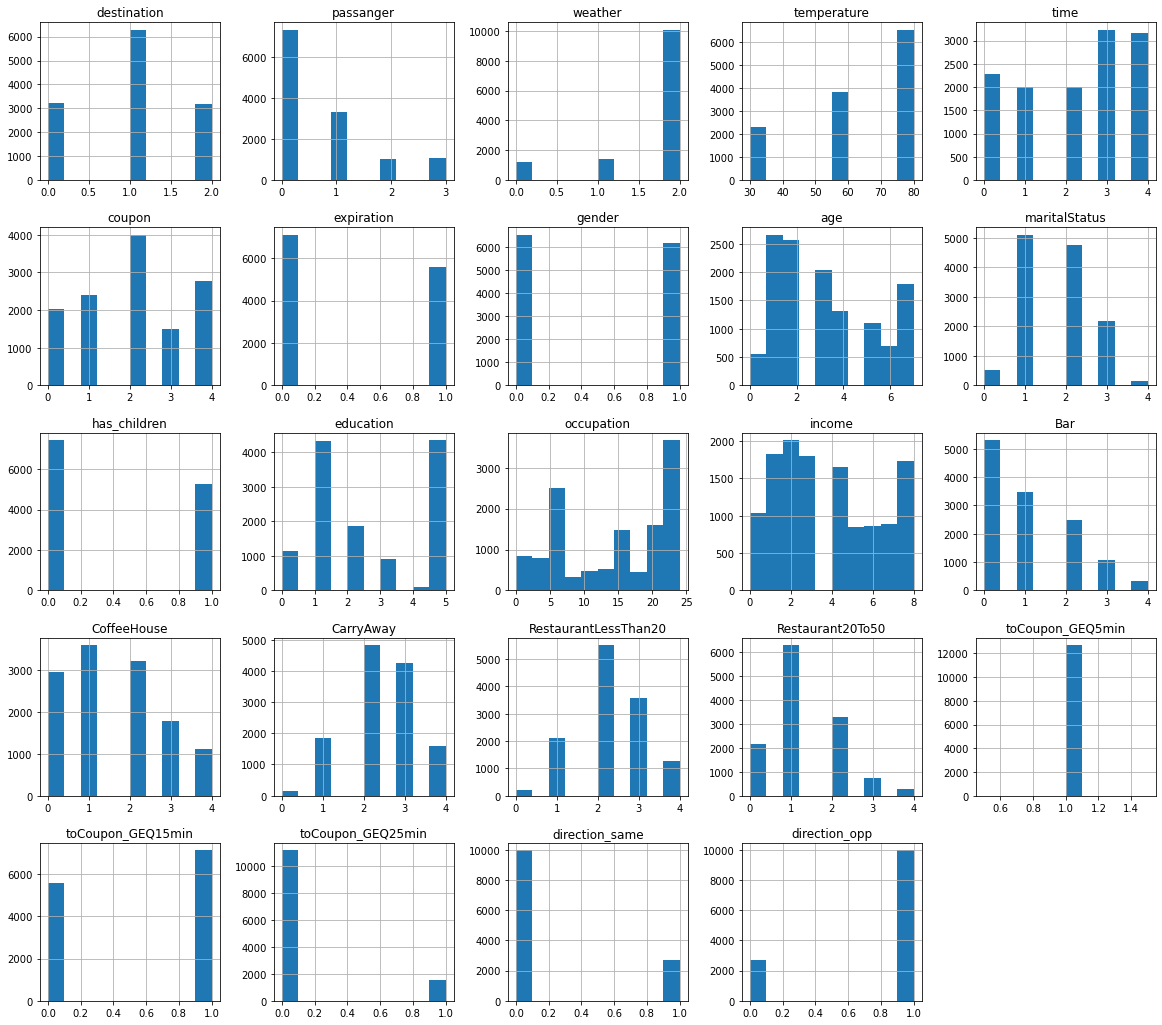

In [16]:
# We start by checking for class imbalance

#Making a copy of df_to_convert
df = data1.copy()

#to exclude Y col
df_visual = df.loc[:, df.columns!='Y']

#displaying distribution of all feature variables
plt.rcParams["figure.figsize"] = (20, 18)
df_visual.hist()

In [17]:
#dropping direction_opp col
df.drop(columns=['direction_opp'], inplace=True)
df.drop(columns=['toCoupon_GEQ5min'],inplace=True)

Text(0.5, 1.0, 'Possibility of accepting the coupon')

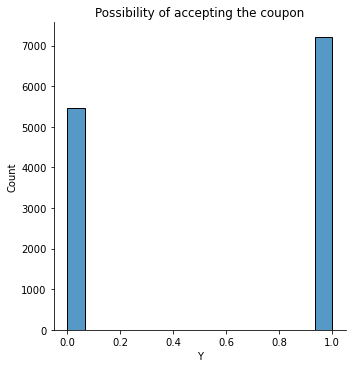

In [18]:
#closer look at Y distribution
#Checking target frequency
sns.displot(df, x='Y')
plt.title("Possibility of accepting the coupon")

In [19]:
#to confirm Y is well balanced
df.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

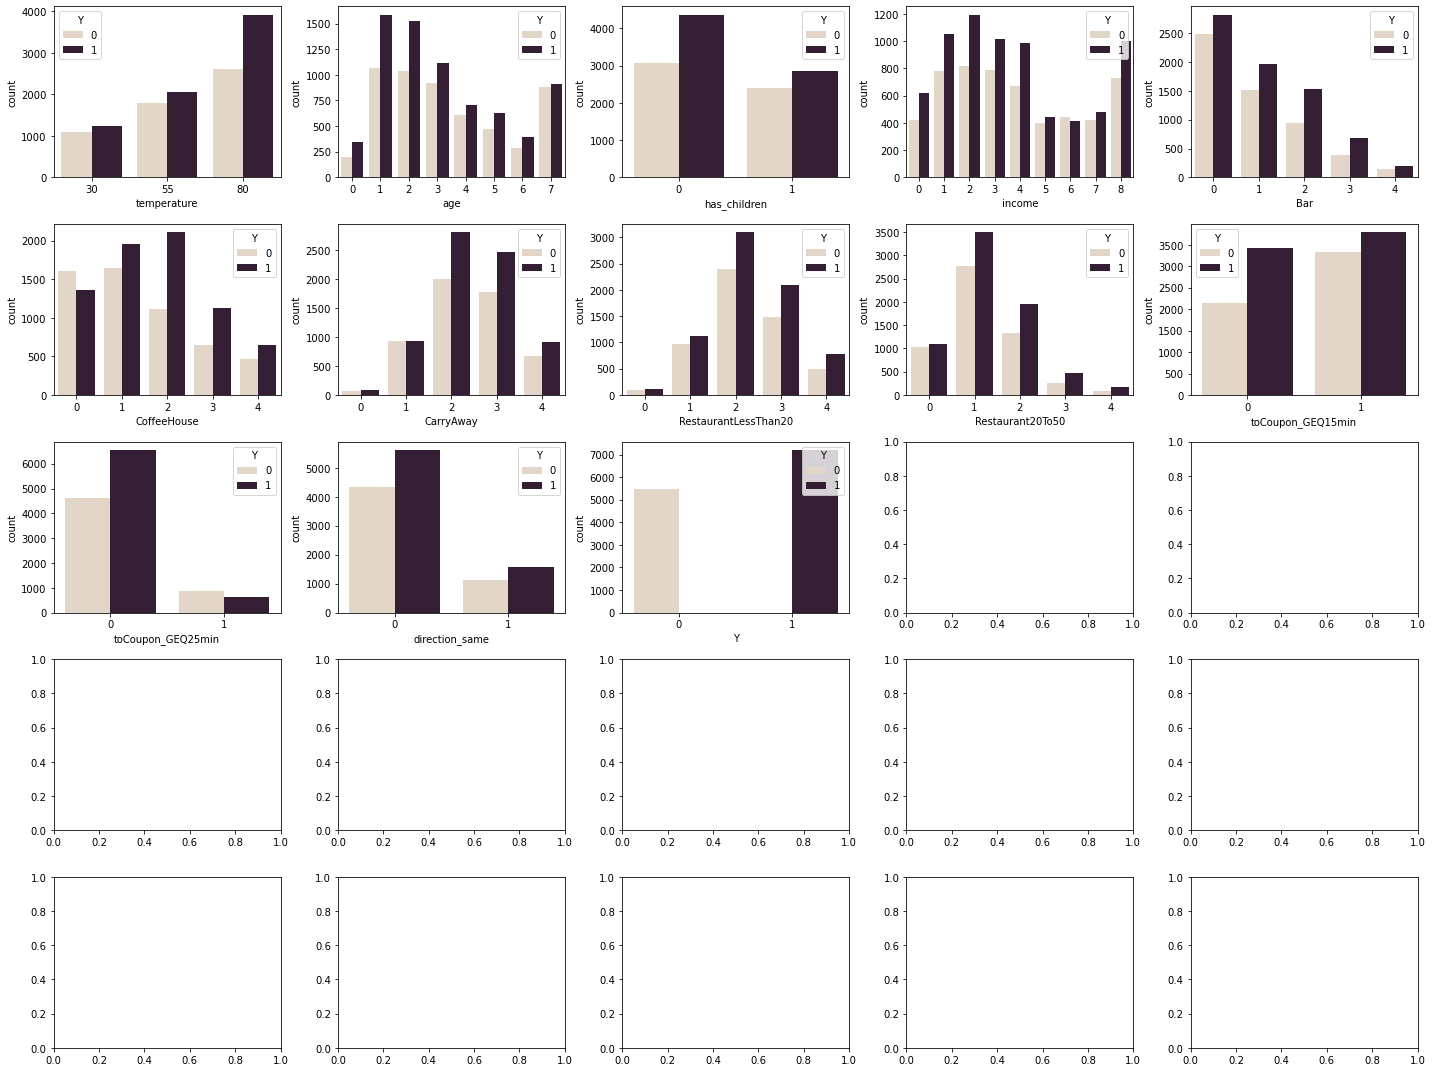

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(20, 15))
axes = axes.flatten()
  
for ax, col in zip(axes, df.select_dtypes('int64').columns):
    sns.countplot(x=col, hue='Y', data=df, 
                  ax=ax, palette="ch:.25");

plt.tight_layout()
plt.show()

In [21]:
# Save the preprocessed dataset to csv
df.to_csv('preprocessed_df.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

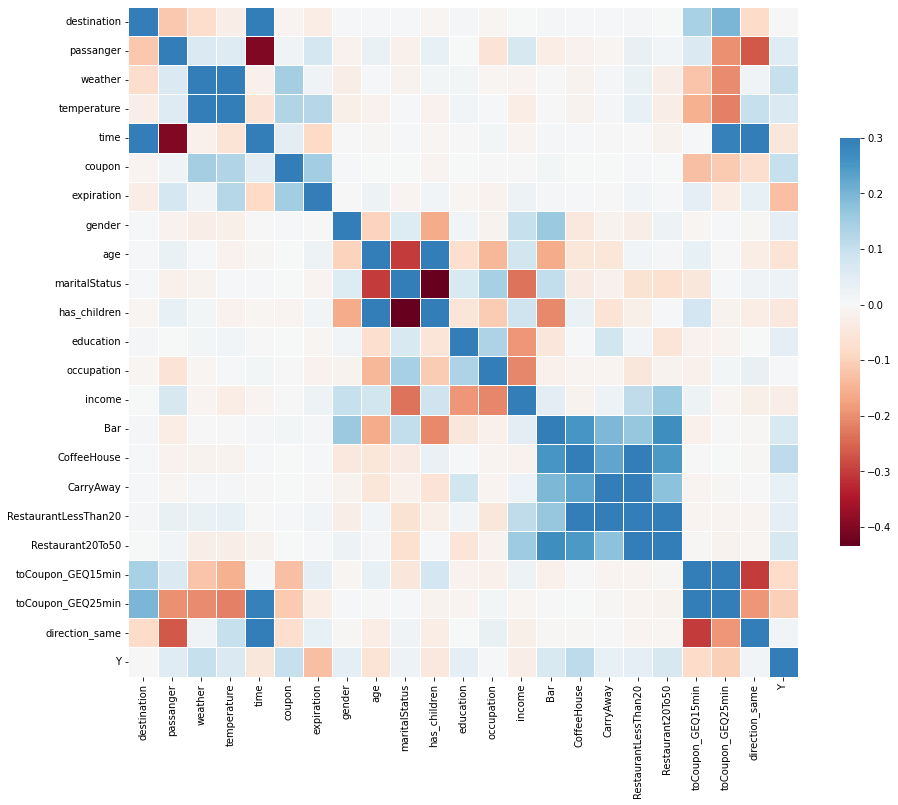

In [22]:
# Plotting a correlation matrix 
f = plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=False, cmap='RdBu',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show

In [23]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,55,2,4,0,0,1,3,...,3,0,0,2,3,2,0,0,0,1
1,1,1,2,80,0,2,1,0,1,3,...,3,0,0,2,3,2,0,0,0,0
2,1,1,2,80,0,1,1,0,1,3,...,3,0,0,2,3,2,1,0,0,1
3,1,1,2,80,2,2,1,0,1,3,...,3,0,0,2,3,2,1,0,0,0
4,1,1,2,80,2,2,0,0,1,3,...,3,0,0,2,3,2,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=.3, random_state=42, shuffle=True, stratify=df['Y'])

In [25]:
#Creating the Dependent Feature Matrix
X_train = train_set.iloc[:, :-1].values
X_test = test_set.iloc[:, :-1].values

#Creating the Independent Vector
y_train = train_set.iloc[:, -1].values
y_test = test_set.iloc[:, -1].values

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=999)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)


classifier = RandomForestClassifier(n_estimators=300, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=cv_method)

In [31]:
from statistics import mean,stdev
print('List of possible accuracy:', all_accuracies)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(all_accuracies)*100, '%')
print('\nMinimum Accuracy:',
      min(all_accuracies)*100, '%')
print('\nOverall Accuracy:',
      mean(all_accuracies)*100, '%')
print('\nStandard Deviation is:', stdev(all_accuracies))

List of possible accuracy: [0.75900901 0.77364865 0.77252252 0.74099099 0.76238739 0.73761261
 0.72972973 0.73873874 0.71589628 0.7621195  0.75225225 0.75225225
 0.72972973 0.74436937 0.74887387 0.77927928 0.76238739 0.75675676
 0.76550169 0.75084555 0.75112613 0.75112613 0.76914414 0.76013514
 0.76689189 0.75       0.74774775 0.76238739 0.76775648 0.73393461]

Maximum Accuracy That can be obtained from this model is: 77.92792792792793 %

Minimum Accuracy: 71.58962795941376 %

Overall Accuracy: 75.31717738031153 %

Standard Deviation is: 0.014764800037105032


In [33]:
### Stratified cross-validation on the dataset train a random forest. 

from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    classifier.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(classifier.score(x_test_fold, y_test_fold))

In [34]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7659574468085106, 0.7722616233254531, 0.7698975571315997, 0.7620173364854216, 0.748422712933754, 0.7358044164037855, 0.750788643533123, 0.7460567823343849, 0.7460567823343849, 0.7744479495268138]

Maximum Accuracy That can be obtained from this model is: 77.44479495268138 %

Minimum Accuracy: 73.58044164037855 %

Overall Accuracy: 75.7171125081723 %

Standard Deviation is: 0.013373785894195384


In [35]:
### Grid search 10-fold cross-validation to tune the hyperparameters of the random forest.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(classifier,
                    param_grid = {'max_depth': [None, 2,3,5], 'max_features' : ['auto','sqrt', 'log2'], 'n_estimators': [10,100],},
                    cv = skf,
                    verbose=50,
                    n_jobs=-1)

grid.fit(X_train, y_train)

print('\nBest R^2 Score : %.2f'%grid.best_score_, ' Best Params : ', str(grid.best_params_))

Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best R^2 Score : 0.75  Best Params :  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


In [36]:
pd.DataFrame(grid.cv_results_)[['param_max_depth', 'param_max_features', 'param_n_estimators','mean_test_score', 'rank_test_score']]


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,rank_test_score
0,None,auto,10,0.710183,4
1,None,auto,100,0.750056,1
2,None,sqrt,10,0.710183,4
3,None,sqrt,100,0.750056,1
4,None,log2,10,0.710183,4
5,None,log2,100,0.750056,1
6,2,auto,10,0.600246,19
7,2,auto,100,0.594616,22
8,2,sqrt,10,0.600246,19
9,2,sqrt,100,0.594616,22


In [37]:
###KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [39]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy', return_train_score=False) 
grid.fit(X, y)
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.621255,0.011628,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.621255,0.011628,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.585616,0.015066,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.616682,0.010605,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.627325,0.010046,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.632608,0.008393,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.609741,0.012463,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.635207,0.009498,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.632369,0.010168,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.644747,0.010552,"{'n_neighbors': 5, 'weights': 'distance'}"


In [40]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6520013150273571
{'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=15, weights='distance')


In [41]:
###SVM
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6240147136100893

In [49]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print(max(scores))

[0.61386919 0.64854216 0.64066194 0.60283688 0.61041009 0.63328076
 0.58675079 0.62539432 0.63249211 0.58044164]
0.6485421591804571


In [50]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']} 
grid = GridSearchCV(clf, param_grid, cv = skf, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=  10.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=  10.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   9.6s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   9.9s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=  10.8s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   8.8s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=  10.1s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   9.7s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   9.3s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   9.7s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.626 total time=   7.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(C=1, kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
print(grid.best_score_)
print(grid.best_params_)

0.7046607910052105
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
